In [225]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import shap
import os
import plotly.graph_objects as go
from shap.plots import waterfall, beeswarm
from shap import Explanation, KernelExplainer
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, r2_score
# from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
# from imblearn.over_sampling import SMOTE

In [226]:

feature_types = {
    "project_feature": ["num_commits", "project_age_days", "num_issues", "num_pull", 
                        "num_stargazers", "num_watchers", "num_forks", "num_subscribers", 
                        "num_contributors", "project_size(kB)"],
    "security_practice": ["ssf0_Binary-Artifacts", "ssf1_Branch-Protection",
                          "ssf3_CII-Best-Practices", "ssf7_Dependency-Update-Tool",
                          "ssf8_Fuzzing", "ssf9_License", "ssf10_Maintained", "ssf13_SAST",
                          "ssf17_Vulnerabilities"],
    "project_quality": ['num_sonarQube_BUG_HIGH', 'num_sonarQube_BUG_MEDIUM', 'num_sonarQube_BUG_LOW', 'num_sonarQube_BUG_BLOCKER',
            'num_sonarQube_VULNERABILITY_HIGH', 'num_sonarQube_VULNERABILITY_MEDIUM', 'num_sonarQube_VULNERABILITY_LOW',
            'num_sonarQube_VULNERABILITY_BLOCKER', 'num_sonarQube_CODE_SMELL_HIGH', 'num_sonarQube_CODE_SMELL_MEDIUM',
            'num_sonarQube_CODE_SMELL_LOW', 'num_sonarQube_CODE_SMELL_BLOCKER'],
}

# Define features and target
# เปลี่ยนฟีเจ้อจรงนี้้ 👇👇👇👇
feature = "project_quality"
# เปลี่ยนcategoryจรงนี้้ 👇👇👇👇
cate = "User guideline"
# range of the plot
model_range = [0, 0.5]
model_range1 = [-0.5, 0.5]


# Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train = pd.read_csv(f"auto/{cate}_{feature}_X_train.csv")
X_test = pd.read_csv(f"auto/{cate}_{feature}_X_test.csv")
y_train = pd.read_csv(f"auto/{cate}_{feature}_y_train.csv")
y_test = pd.read_csv(f"auto/{cate}_{feature}_y_test.csv")
        
# Train the RandomForestClassifier with given parameters
### Generic policy ###
if feature == "project_feature" and cate == "Generic policy":
    model = RandomForestClassifier(
        max_features=1, min_samples_leaf=6, min_samples_split=7,
        n_estimators=512, n_jobs=1, random_state=1, warm_start=True
    )
    model_type = "tree"
elif feature == "security_practice" and cate == "Generic policy":
    model = RandomForestClassifier(
        bootstrap=False, max_features=1, min_samples_leaf=3,
        min_samples_split=14, n_estimators=512, n_jobs=1,
        random_state=1, warm_start=True
    )
    model_type = "tree"
elif feature == "project_quality" and cate == "Generic policy":
    model = AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=10),
                   learning_rate=0.010381491760996881, n_estimators=362,
                   random_state=1)
    model_type = "ada"
### Reporting mechanism ###
elif feature == "project_feature" and cate == "Reporting mechanism":
    model = ExtraTreesClassifier(bootstrap=True, criterion='entropy', max_features=1,
                     min_samples_split=7, n_estimators=512, n_jobs=1,
                     random_state=1, warm_start=True)
    model_type = "tree"
elif feature == "security_practice" and cate == "Reporting mechanism":
    model = HistGradientBoostingClassifier(early_stopping=True,
                               l2_regularization=8.908183652101429e-05,
                               learning_rate=0.19911994270380215,
                               max_iter=512, max_leaf_nodes=955,
                               min_samples_leaf=33, n_iter_no_change=2,
                               random_state=1, validation_fraction=None,
                               warm_start=True)
    model_type = "hist"
elif feature == "project_quality" and cate == "Reporting mechanism":
    model = KNeighborsClassifier(n_neighbors=2, p=1, weights='distance') ####🥶🥶🥶🥶🥶
    model_type = "kernel"
### Scope of practice ###
elif feature == "project_feature" and cate == "Scope of practice":
    model = RandomForestClassifier(max_features=15, min_samples_leaf=5,
                       min_samples_split=20, n_estimators=512, n_jobs=1,
                       random_state=1, warm_start=True)
    model_type = "tree"
elif feature == "security_practice" and cate == "Scope of practice":
    model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=9),
                   learning_rate=1.9701455892241493, n_estimators=101,
                   random_state=1)
    model_type = "ada"
elif feature == "project_quality" and cate == "Scope of practice":
    model = RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=4,
                       min_samples_leaf=7, n_estimators=512, n_jobs=1,
                       random_state=1, warm_start=True)
    model_type = "tree"
### User guideline ###
elif feature == "project_feature" and cate == "User guideline":
    model = ExtraTreesClassifier(criterion='entropy', max_features=2, n_estimators=512,
                     n_jobs=1, random_state=1, warm_start=True)
    model_type = "tree"
elif feature == "security_practice" and cate == "User guideline":
    model = HistGradientBoostingClassifier(early_stopping=True,
                               l2_regularization=0.1144885415414585,
                               learning_rate=0.35651231429733377, 
                               max_iter=128, max_leaf_nodes=570,
                               min_samples_leaf=52, n_iter_no_change=20,
                               random_state=1,
                               validation_fraction=0.26745137407982933,
                               warm_start=True)
    model_type = "hist"
elif feature == "project_quality" and cate == "User guideline":
    model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.16884660398877008, n_estimators=144,
                   random_state=1)
    model_type = "ada"
else:
    raise ValueError("Invalid feature or category selection.")

print(model)

model.fit(X_train, y_train)

# AUC
# Predict the probabilities for the test set
y_probs = model.predict_proba(X_test)[:, 1]
# Predict the classes for the test set
y_pred = model.predict(X_test)

# Calculate the AUC - ROC score
roc_auc = roc_auc_score(y_test, y_probs) 

# Calculate other metrics
accuracy = accuracy_score(y_test, y_pred)

print(f"AUC - ROC Score: {roc_auc:.2f}")

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_pred, y_test)
print(f"Accuracy: {accuracy}")
print("Classification report:")
print(report)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.16884660398877008, n_estimators=144,
                   random_state=1)
AUC - ROC Score: 0.71
Accuracy: 0.6339869281045751
Classification report:
              precision    recall  f1-score   support

           0       0.57      0.69      0.62        67
           1       0.71      0.59      0.65        86

    accuracy                           0.63       153
   macro avg       0.64      0.64      0.63       153
weighted avg       0.65      0.63      0.64       153



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



how to read graph: https://www.aidancooper.co.uk/a-non-technical-guide-to-interpreting-shap-analyses/

tree explainer: https://medium.com/analytics-vidhya/shap-part-3-tree-shap-3af9bcd7cd9b

shap index 0 or 1: https://github.com/shap/shap/issues/1252

readability shap: https://medium.com/towards-data-science/how-to-easily-customize-shap-plots-in-python-fdff9c0483f2

TreeExplainer (Optimized for Trees)

In [227]:
if model_type == "tree":
    #### Tree explainer ####
    explainer = shap.TreeExplainer(model)
    shap_values_tree = explainer.shap_values(X_test)

    print("Data in SHAP values:")
    print(shap_values_tree) # print data for check

    print("-"*40)
    ##############################################################################################

    #### TMean and Absolute ####
    shap_df = pd.DataFrame(shap_values_tree[:, :, 1], columns=X_test.columns)

    # Compute and print raw mean SHAP values
    abs_mean_shap_raw = shap_df.abs().mean(0).sort_values(ascending=False)
    print("Absolute Mean SHAP raw:")
    print(abs_mean_shap_raw)
    # Compute and print raw mean SHAP values
    mean_shap_raw = shap_df.mean(0).sort_values(ascending=False)
    print("Mean SHAP raw:")
    print(mean_shap_raw)

    print("-"*40)
    ##############################################################################################

    #### Plot by SHAP ####
    custom_cmap = mcolors.LinearSegmentedColormap.from_list("pink_skyblue", ["mediumturquoise", "crimson"])#cmap
    shap.summary_plot(shap_values_tree[:, :, 1], X_test, cmap=custom_cmap) # Create the SHAP summary plot
    # shap.summary_plot(shap_values_tree[:, :, 1], X_test, plot_type="bar", show=True)
    ##############################################################################################

    #### get data to plot by me ####
    feature_names = X_test.columns.tolist() # Get feature names from X_test

    num_samples, num_features, num_classes = shap_values_tree.shape  # Convert SHAP values to a 2D format
    reshaped_values = shap_values_tree.reshape(num_samples, num_features * num_classes)

    columns = [f"{feature_names[i]}_Class_{j}" for i in range(num_features) for j in range(num_classes)] # Create dynamic column names using real feature names

    df = pd.DataFrame(reshaped_values, columns=columns)# Convert to DataFrame

    # print(df.head()) # Display first few rows

    # Select only columns corresponding to Class 1
    class_1_columns = [col for col in columns if "_Class_1" in col]  # Filter Class 1 columns
    df_class_1 = df[class_1_columns]  # Select only Class 1 SHAP values

    df_class_1.columns = [col.replace("_Class_1", "") for col in df_class_1.columns] # Rename columns to remove "_Class_1" suffix for clarity

    # Display first few rows
    print(df_class_1.head())
    print("-"*40)
    ##############################################################################################

    #### Plot by Me in bar ####
    # Compute absolute mean SHAP values for correct sorting
    df_mean = df_class_1.abs().mean(numeric_only=True).reset_index()  # Use absolute values for sorting
    df_mean.columns = ['Feature', 'Mean |SHAP Value|']
    df_mean = df_mean.sort_values(by="Mean |SHAP Value|", ascending=True)  # Sort by absolute impact

    # Compute actual mean SHAP values for correct bar coloring
    df_signed_mean = df_class_1.mean(numeric_only=True).reset_index()
    df_signed_mean.columns = ['Feature', 'Mean SHAP Value']

    # Merge both to get proper ordering and sign information
    df_final = df_mean.merge(df_signed_mean, on="Feature")

    # Assign colors: red for positive, blue for negative values
    df_final["Color"] = df_final["Mean SHAP Value"].apply(lambda x: "mediumturquoise" if x >= 0 else "crimson")

    # Creating the horizontal bar plot with correct order
    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=df_final["Mean |SHAP Value|"],
        y=df_final["Feature"],
        orientation='h',
        marker=dict(color=df_final["Color"]),
        text=[f"{v:.3f}" for v in df_final["Mean |SHAP Value|"]],  # Annotate absolute SHAP values
        textposition="outside"
    ))

    # Updating layout to match SHAP importance plot style
    fig.update_layout(

        title=f"{cate}:{feature}",
        title_font_size=24,
        xaxis_title="Mean SHAP Value (Average Impact on Model Output)",
        xaxis_title_font_size=20, 
        yaxis_title="Features",
        yaxis_title_font_size=21,
        template="plotly_white",
        font=dict(size=18),  # Increase overall font size
        xaxis=dict(
            range=model_range,
            tickfont=dict(size=18),  # Increase x-axis tick label font size
            zeroline=True,  # Keep central reference line
            zerolinecolor="black",
            zerolinewidth=2,
        ),
        yaxis=dict(
            tickfont=dict(size=18)  # Increase y-axis tick label font size
        ),
        showlegend=False,  # No legend needed
        width=1200,  # Set figure width
        height=500,  # Set figure height
    )

    # Show the plot
    fig.show()
    # Ensure the "shap" directory exists before saving
    directory = "shap"
    os.makedirs(directory, exist_ok=True)  # Create folder if it doesn't exist

    # Define save path
    save_path = f"{directory}/{cate}_{feature}_bar_left_plot.png"

    # Save the figure as an image
    fig.write_image(save_path)
    print(f"Figure saved successfully at: {save_path}")
    ##############################################################################################
        
    #### Plot ####
    # Compute absolute mean SHAP values for correct sorting
    df_mean = df_class_1.abs().mean().reset_index()
    df_mean.columns = ['Feature', 'Mean |SHAP Value|']
    df_mean = df_mean.sort_values(by="Mean |SHAP Value|", ascending=True)

    # Display the data
    print(df_signed_mean)

    # Compute actual mean SHAP values for correct bar coloring
    df_signed_mean = df_class_1.mean(numeric_only=True).reset_index()
    df_signed_mean.columns = ['Feature', 'Mean SHAP Value']

    # Merge both to get proper ordering and sign information
    df_final = df_mean.merge(df_signed_mean, on="Feature")

    # Assign colors: red for positive, blue for negative values
    df_final["Color"] = df_final["Mean SHAP Value"].apply(lambda x: "mediumturquoise" if x >= 0 else "crimson")

    # Adjust x values: move positive SHAP values to the negative x-axis
    df_final["Adjusted SHAP Value"] = df_final.apply(
        lambda row: -row["Mean |SHAP Value|"] if row["Mean SHAP Value"] <= 0 else row["Mean |SHAP Value|"], axis=1
    )

    # Determine max range for better spacing
    max_x = max(df_final["Mean |SHAP Value|"]) * 1.2  # Extend the range by 20% for better spacing

    # Creating the horizontal bar plot with correct order
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=df_final["Adjusted SHAP Value"],
        y=df_final["Feature"],
        orientation='h',
        marker=dict(color=df_final["Color"]),
        text=[f"{v:.3f}" for v in df_final["Mean |SHAP Value|"]],  # Annotate absolute SHAP values
        textposition="outside",  # Move text outside to avoid overlap
        textfont=dict(size=16),  # Increase font size for visibility
    ))

    # Updating layout to match SHAP importance plot style
    fig.update_layout(
        title=f"{cate}:{feature}",
        title_font_size=24,
        xaxis_title="Mean SHAP Value (Average Impact on Model Output)",
        xaxis_title_font_size=20,
        yaxis_title="Features",
        yaxis_title_font_size=21,
        template="plotly_white",
        font=dict(size=18),
        xaxis=dict(
            range=model_range1,  # Extend range to avoid label cutting
            tickfont=dict(size=18),
            zeroline=True,  # Keep central reference line
            zerolinecolor="black",
            zerolinewidth=2,
        ),
        yaxis=dict(
            tickfont=dict(size=18),
            automargin=True  # Automatically adjust margins
        ),
        showlegend=False,
        width=1400,  # Increase width to fit labels better
        height=600,  # Increase height for better spacing
        margin=dict(l=200, r=50, t=50, b=50),  # Extend left margin for long feature names
    )

    # Show the plot
    fig.show()
    # Ensure the "shap" directory exists before saving
    directory = "shap"
    os.makedirs(directory, exist_ok=True)  # Create folder if it doesn't exist

    # Define save path
    save_path = f"{directory}/{cate}_{feature}_diverging_plot.png"

    # Save the figure as an image
    fig.write_image(save_path)
    print(f"Figure saved successfully at: {save_path}")
  

Tree: HistGradientBoost

In [228]:
if model_type == "hist":
    #### Tree explainer ####
    explainer = shap.TreeExplainer(model)
    shap_values_tree = explainer.shap_values(X_test)


    # Check if SHAP values are a list (Binary classification case)
    if isinstance(shap_values_tree, list):  
        shap_values_tree = shap_values_tree[1]  # Use Class 1 SHAP values

    # Ensure it's a NumPy array
    shap_values_tree = np.array(shap_values_tree)

    print("SHAP values shape:", shap_values_tree.shape)  # Debugging

    print("Data in SHAP values:")
    print(shap_values_tree)  # Print data for check

    print("-" * 40)
    ##############################################################################################

    #### Mean and Absolute Mean SHAP values ####
    shap_df = pd.DataFrame(shap_values_tree, columns=X_test.columns)

    # Compute absolute mean SHAP values
    abs_mean_shap_raw = shap_df.abs().mean(0).sort_values(ascending=False)
    print("Absolute Mean SHAP raw:")
    print(abs_mean_shap_raw)

    # Compute actual mean SHAP values
    mean_shap_raw = shap_df.mean(0).sort_values(ascending=False)
    print("Mean SHAP raw:")
    print(mean_shap_raw)

    print("-" * 40)
    ##############################################################################################

    #### Plot by SHAP ####
    custom_cmap = mcolors.LinearSegmentedColormap.from_list("pink_skyblue", ["mediumturquoise", "crimson"])#cmap
    shap.summary_plot(shap_values_tree, X_test, cmap=custom_cmap) # Create the SHAP summary plot

    ##############################################################################################

    #### Prepare Data for Custom Plot ####
    feature_names = X_test.columns.tolist()  # Get feature names from X_test

    # Convert SHAP values to DataFrame
    df_class_1 = pd.DataFrame(shap_values_tree, columns=feature_names)

    # Display first few rows
    print(df_class_1.head())
    print("-" * 40)
    ##############################################################################################

    #### Plot by Me ####
    # Compute absolute mean SHAP values for correct sorting
    df_mean = df_class_1.abs().mean().reset_index()
    df_mean.columns = ['Feature', 'Mean |SHAP Value|']
    df_mean = df_mean.sort_values(by="Mean |SHAP Value|", ascending=True)  # Sort by absolute impact

    # Compute actual mean SHAP values for correct bar coloring
    df_signed_mean = df_class_1.mean(numeric_only=True).reset_index()
    df_signed_mean.columns = ['Feature', 'Mean SHAP Value']

    # Merge both to get proper ordering and sign information
    df_final = df_mean.merge(df_signed_mean, on="Feature")

    # Assign colors: red for positive, blue for negative values
    df_final["Color"] = df_final["Mean SHAP Value"].apply(lambda x: "mediumturquoise" if x >= 0 else "crimson")

    # Creating the horizontal bar plot with correct order
    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=df_final["Mean |SHAP Value|"],
        y=df_final["Feature"],
        orientation='h',
        marker=dict(color=df_final["Color"]),
        text=[f"{v:.3f}" for v in df_final["Mean |SHAP Value|"]],  # Annotate absolute SHAP values
        textposition="outside"
    ))

    # Updating layout to match SHAP importance plot style
    fig.update_layout(

        title=f"{cate}:{feature}",
        title_font_size=24,
        xaxis_title="Mean SHAP Value (Average Impact on Model Output)",
        xaxis_title_font_size=20, 
        yaxis_title="Features",
        yaxis_title_font_size=21,
        template="plotly_white",
        font=dict(size=18),  # Increase overall font size
        xaxis=dict(
            range=model_range,
            tickfont=dict(size=18),  # Increase x-axis tick label font size
            zeroline=True,  # Keep central reference line
            zerolinecolor="black",
            zerolinewidth=2,
        ),
        yaxis=dict(
            tickfont=dict(size=18)  # Increase y-axis tick label font size
        ),
        showlegend=False,  # No legend needed
        width=1200,  # Set figure width
        height=500,  # Set figure height
    )

    # Show the plot
    fig.show()
    # Ensure the "shap" directory exists before saving
    directory = "shap"
    os.makedirs(directory, exist_ok=True)  # Create folder if it doesn't exist

    # Define save path
    save_path = f"{directory}/{cate}_{feature}_bar_left_plot.png"

    # Save the figure as an image
    fig.write_image(save_path)
    print(f"Figure saved successfully at: {save_path}")
    ##############################################################################################
        
    #### Plot ####
    # Compute absolute mean SHAP values for correct sorting
    df_mean = df_class_1.abs().mean().reset_index()
    df_mean.columns = ['Feature', 'Mean |SHAP Value|']
    df_mean = df_mean.sort_values(by="Mean |SHAP Value|", ascending=True)

    # Compute actual mean SHAP values for correct bar coloring
    df_signed_mean = df_class_1.mean(numeric_only=True).reset_index()
    df_signed_mean.columns = ['Feature', 'Mean SHAP Value']

    # Merge both to get proper ordering and sign information
    df_final = df_mean.merge(df_signed_mean, on="Feature")

    # Assign colors: red for positive, blue for negative values
    df_final["Color"] = df_final["Mean SHAP Value"].apply(lambda x: "mediumturquoise" if x >= 0 else "crimson")

    # Adjust x values: move positive SHAP values to the negative x-axis
    df_final["Adjusted SHAP Value"] = df_final.apply(
        lambda row: -row["Mean |SHAP Value|"] if row["Mean SHAP Value"] <= 0 else row["Mean |SHAP Value|"], axis=1
    )

    # Determine max range for better spacing
    max_x = max(df_final["Mean |SHAP Value|"]) * 1.2  # Extend the range by 20% for better spacing

    # Creating the horizontal bar plot with correct order
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=df_final["Adjusted SHAP Value"],
        y=df_final["Feature"],
        orientation='h',
        marker=dict(color=df_final["Color"]),
        text=[f"{v:.3f}" for v in df_final["Mean |SHAP Value|"]],  # Annotate absolute SHAP values
        textposition="outside",  # Move text outside to avoid overlap
        textfont=dict(size=16),  # Increase font size for visibility
    ))

    # Updating layout to match SHAP importance plot style
    fig.update_layout(
        title=f"{cate}:{feature}",
        title_font_size=24,
        xaxis_title="Mean SHAP Value (Average Impact on Model Output)",
        xaxis_title_font_size=20,
        yaxis_title="Features",
        yaxis_title_font_size=21,
        template="plotly_white",
        font=dict(size=18),
        xaxis=dict(
            range=model_range1,  # Extend range to avoid label cutting
            tickfont=dict(size=18),
            zeroline=True,  # Keep central reference line
            zerolinecolor="black",
            zerolinewidth=2,
        ),
        yaxis=dict(
            tickfont=dict(size=18),
            automargin=True  # Automatically adjust margins
        ),
        showlegend=False,
        width=1400,  # Increase width to fit labels better
        height=600,  # Increase height for better spacing
        margin=dict(l=200, r=50, t=50, b=50),  # Extend left margin for long feature names
    )

    # Show the plot
    fig.show()
    # Ensure the "shap" directory exists before saving
    directory = "shap"
    os.makedirs(directory, exist_ok=True)  # Create folder if it doesn't exist

    # Define save path
    save_path = f"{directory}/{cate}_{feature}_diverging_plot.png"

    # Save the figure as an image
    fig.write_image(save_path)
    print(f"Figure saved successfully at: {save_path}")

KernelExplainer (Model-Agnostic)

In [229]:
# # 2. KernelExplainer (Model-Agnostic)
# kernel_explainer = shap.KernelExplainer(model.predict, X_train)  # Use a small sample for efficiency
# shap_values_kernel = kernel_explainer.shap_values(X_test)

In [230]:
# print(shap_values_kernel)

In [231]:
# shap.summary_plot(shap_values_kernel, X_test)

100%|██████████| 153/153 [00:01<00:00, 80.52it/s]

SHAP values shape: (153, 5)
Data in SHAP values:
[[ 2.57333333e-01  8.23333333e-02  7.73333333e-02 -2.93333333e-02
   7.23333333e-02]
 [ 2.63000000e-01 -3.70000000e-02  1.93000000e-01  6.80000000e-02
  -2.70000000e-02]
 [-2.45000000e-01 -1.08333333e-01 -7.83333333e-02 -5.33333333e-02
  -5.50000000e-02]
 [ 2.63333333e-01  5.00000000e-03  2.11666667e-01 -3.16666667e-02
   1.16666667e-02]
 [ 9.10000000e-02 -2.39000000e-01 -2.25666667e-01 -9.73333333e-02
  -6.90000000e-02]
 [ 2.63333333e-01  5.00000000e-03  2.11666667e-01 -3.16666667e-02
   1.16666667e-02]
 [ 4.08666667e-01 -2.96666667e-02 -5.80000000e-02  1.97000000e-01
  -5.80000000e-02]
 [ 2.54333333e-01 -4.00000000e-03  2.02666667e-01 -6.73333333e-02
   7.43333333e-02]
 [ 7.56666667e-02 -2.36000000e-01 -2.22666667e-01 -1.16000000e-01
  -4.10000000e-02]
 [ 3.44333333e-01 -6.73333333e-02  2.66666667e-03  2.47666667e-01
  -6.73333333e-02]
 [ 9.40000000e-02 -2.93333333e-02 -3.71000000e-01 -1.44333333e-01
  -8.93333333e-02]
 [ 2.48666667e-0

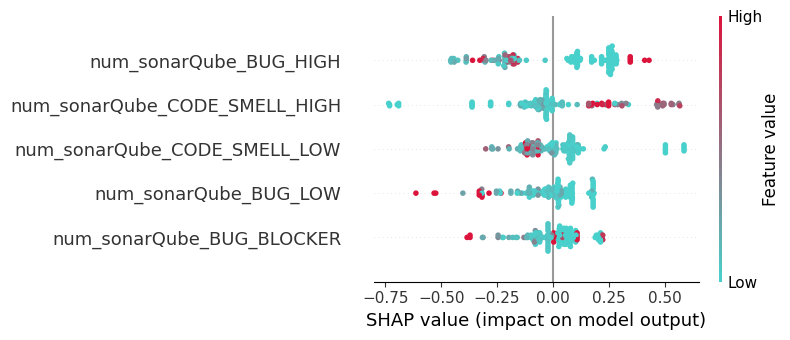

   num_sonarQube_BUG_HIGH  num_sonarQube_BUG_LOW  num_sonarQube_BUG_BLOCKER  \
0                0.257333               0.082333                   0.077333   
1                0.263000              -0.037000                   0.193000   
2               -0.245000              -0.108333                  -0.078333   
3                0.263333               0.005000                   0.211667   
4                0.091000              -0.239000                  -0.225667   

   num_sonarQube_CODE_SMELL_HIGH  num_sonarQube_CODE_SMELL_LOW  
0                      -0.029333                      0.072333  
1                       0.068000                     -0.027000  
2                      -0.053333                     -0.055000  
3                      -0.031667                      0.011667  
4                      -0.097333                     -0.069000  
----------------------------------------


                         Feature  Mean SHAP Value
0         num_sonarQube_BUG_HIGH         0.011259
1          num_sonarQube_BUG_LOW        -0.024057
2      num_sonarQube_BUG_BLOCKER         0.003863
3  num_sonarQube_CODE_SMELL_HIGH         0.015083
4   num_sonarQube_CODE_SMELL_LOW         0.015943


Figure saved successfully at: shap/User guideline_project_quality_diverging_plot.png


In [232]:
if model_type == "kernel" or model_type == "ada":
    #### Kernel Explainer ####
    background = X_train.sample(n=50, random_state=42)  # Sample background data for SHAP
    explainer = shap.KernelExplainer(model.predict, background)
    shap_values_kernel = explainer.shap_values(X_test, nsamples=100)

    # Ensure SHAP values are a NumPy array
    shap_values_kernel = np.array(shap_values_kernel)

    print("SHAP values shape:", shap_values_kernel.shape)  # Debugging
    print("Data in SHAP values:")
    print(shap_values_kernel)  # Print data for check
    print("-" * 40)
    ##############################################################################################

    #### Mean and Absolute Mean SHAP values ####
    shap_df = pd.DataFrame(shap_values_kernel, columns=X_test.columns)

    # Compute absolute mean SHAP values
    abs_mean_shap_raw = shap_df.abs().mean(0).sort_values(ascending=False)
    print("Absolute Mean SHAP raw:")
    print(abs_mean_shap_raw)

    # Compute actual mean SHAP values
    mean_shap_raw = shap_df.mean(0).sort_values(ascending=False)
    print("Mean SHAP raw:")
    print(mean_shap_raw)
    print("-" * 40)
    ##############################################################################################

    #### Plot by SHAP ####
    custom_cmap = mcolors.LinearSegmentedColormap.from_list("pink_skyblue", ["mediumturquoise", "crimson"])
    shap.summary_plot(shap_values_kernel, X_test, cmap=custom_cmap)  # Create the SHAP summary plot

    ##############################################################################################

    #### Prepare Data for Custom Plot ####
    feature_names = X_test.columns.tolist()  # Get feature names from X_test
    df_class_1 = pd.DataFrame(shap_values_kernel, columns=feature_names)

    # Display first few rows
    print(df_class_1.head())
    print("-" * 40)
    ##############################################################################################

    #### Plot by Me ####
    # Compute absolute mean SHAP values for correct sorting
    df_mean = df_class_1.abs().mean().reset_index()
    df_mean.columns = ['Feature', 'Mean |SHAP Value|']
    df_mean = df_mean.sort_values(by="Mean |SHAP Value|", ascending=True)

    # Compute actual mean SHAP values for correct bar coloring
    df_signed_mean = df_class_1.mean(numeric_only=True).reset_index()
    df_signed_mean.columns = ['Feature', 'Mean SHAP Value']

    # Merge both to get proper ordering and sign information
    df_final = df_mean.merge(df_signed_mean, on="Feature")

    # Assign colors: red for positive, blue for negative values
    df_final["Color"] = df_final["Mean SHAP Value"].apply(lambda x: "mediumturquoise" if x >= 0 else "crimson")

    # Creating the horizontal bar plot with correct order
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=df_final["Mean |SHAP Value|"],
        y=df_final["Feature"],
        orientation='h',
        marker=dict(color=df_final["Color"]),
        text=[f"{v:.3f}" for v in df_final["Mean |SHAP Value|"]],  # Annotate absolute SHAP values
        textposition="outside"
    ))

    # Updating layout to match SHAP importance plot style
    fig.update_layout(
        title=f"{cate}:{feature}",
        title_font_size=24,
        xaxis_title="Mean SHAP Value (Average Impact on Model Output)",
        xaxis_title_font_size=20,
        yaxis_title="Features",
        yaxis_title_font_size=21,
        template="plotly_white",
        font=dict(size=18),
        xaxis=dict(
            range=model_range,
            tickfont=dict(size=18),
            zeroline=True,  # Keep central reference line
            zerolinecolor="black",
            zerolinewidth=2,
        ),
        yaxis=dict(
            tickfont=dict(size=18)
        ),
        showlegend=False,
        width=1200,
        height=500,
    )

    # Show the plot
    fig.show()

    # Ensure the "shap" directory exists before saving
    # directory = "shap"
    # os.makedirs(directory, exist_ok=True)

    # # Define save path
    # save_path = f"{directory}/{cate}_{feature}_bar_left_plot.png"

    # # Save the figure as an image
    # fig.write_image(save_path)
    # print(f"Figure saved successfully at: {save_path}")
    ##############################################################################################
    ##############################################################################################
        
    #### Plot ####
    # Compute absolute mean SHAP values for correct sorting
    df_mean = df_class_1.abs().mean().reset_index()
    df_mean.columns = ['Feature', 'Mean |SHAP Value|']
    df_mean = df_mean.sort_values(by="Mean |SHAP Value|", ascending=True)

    # Display the data
    print(df_signed_mean)
    
    # Compute actual mean SHAP values for correct bar coloring
    df_signed_mean = df_class_1.mean(numeric_only=True).reset_index()
    df_signed_mean.columns = ['Feature', 'Mean SHAP Value']

    # Merge both to get proper ordering and sign information
    df_final = df_mean.merge(df_signed_mean, on="Feature")

    # Assign colors: red for positive, blue for negative values
    df_final["Color"] = df_final["Mean SHAP Value"].apply(lambda x: "mediumturquoise" if x >= 0 else "crimson")

    # Adjust x values: move positive SHAP values to the negative x-axis
    df_final["Adjusted SHAP Value"] = df_final.apply(
        lambda row: -row["Mean |SHAP Value|"] if row["Mean SHAP Value"] <= 0 else row["Mean |SHAP Value|"], axis=1
    )

    # Determine max range for better spacing
    max_x = max(df_final["Mean |SHAP Value|"]) * 1.2  # Extend the range by 20% for better spacing

    # Creating the horizontal bar plot with correct order
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=df_final["Adjusted SHAP Value"],
        y=df_final["Feature"],
        orientation='h',
        marker=dict(color=df_final["Color"]),
        text=[f"{v:.3f}" for v in df_final["Mean |SHAP Value|"]],  # Annotate absolute SHAP values
        textposition="outside",  # Move text outside to avoid overlap
        textfont=dict(size=16),  # Increase font size for visibility
    ))

    # Updating layout to match SHAP importance plot style
    fig.update_layout(
        title=f"{cate}:{feature}",
        title_font_size=24,
        xaxis_title="Mean SHAP Value (Average Impact on Model Output)",
        xaxis_title_font_size=20,
        yaxis_title="Features",
        yaxis_title_font_size=21,
        template="plotly_white",
        font=dict(size=18),
        xaxis=dict(
            range=model_range1,  # Extend range to avoid label cutting
            tickfont=dict(size=18),
            zeroline=True,  # Keep central reference line
            zerolinecolor="black",
            zerolinewidth=2,
        ),
        yaxis=dict(
            tickfont=dict(size=18),
            automargin=True  # Automatically adjust margins
        ),
        showlegend=False,
        width=1400,  # Increase width to fit labels better
        height=600,  # Increase height for better spacing
        margin=dict(l=200, r=50, t=50, b=50),  # Extend left margin for long feature names
    )

    # Show the plot
    fig.show()
    # Ensure the "shap" directory exists before saving
    directory = "shap"
    os.makedirs(directory, exist_ok=True)  # Create folder if it doesn't exist

    # Define save path
    save_path = f"{directory}/{cate}_{feature}_diverging_plot.png"

    # Save the figure as an image
    fig.write_image(save_path)
    print(f"Figure saved successfully at: {save_path}")

In [233]:
# #### Plot by Me ####
# # Compute absolute mean SHAP values for correct sorting
# df_mean = df_class_1.abs().mean().reset_index()
# df_mean.columns = ['Feature', 'Mean |SHAP Value|']
# df_mean = df_mean.sort_values(by="Mean |SHAP Value|", ascending=True)

# # Compute actual mean SHAP values for correct bar coloring
# df_signed_mean = df_class_1.mean(numeric_only=True).reset_index()
# df_signed_mean.columns = ['Feature', 'Mean SHAP Value']

# # Merge both to get proper ordering and sign information
# df_final = df_mean.merge(df_signed_mean, on="Feature")

# # Assign colors: red for positive, blue for negative values
# df_final["Color"] = df_final["Mean SHAP Value"].apply(lambda x: "mediumturquoise" if x >= 0 else "crimson")

# # Adjust x values: move positive SHAP values to the negative x-axis
# df_final["Adjusted SHAP Value"] = df_final.apply(
#     lambda row: -row["Mean |SHAP Value|"] if row["Mean SHAP Value"] <= 0 else row["Mean |SHAP Value|"], axis=1
# )

# # Determine max range for better spacing
# max_x = max(df_final["Mean |SHAP Value|"]) * 1.2  # Extend the range by 20% for better spacing

# # Creating the horizontal bar plot with correct order
# fig = go.Figure()
# fig.add_trace(go.Bar(
#     x=df_final["Adjusted SHAP Value"],
#     y=df_final["Feature"],
#     orientation='h',
#     marker=dict(color=df_final["Color"]),
#     text=[f"{v:.3f}" for v in df_final["Mean |SHAP Value|"]],  # Annotate absolute SHAP values
#     textposition="outside",  # Move text outside to avoid overlap
#     textfont=dict(size=16),  # Increase font size for visibility
# ))

# # Updating layout to match SHAP importance plot style
# fig.update_layout(
#     title=f"{cate}:{feature}",
#     title_font_size=24,
#     xaxis_title="Mean SHAP Value (Average Impact on Model Output)",
#     xaxis_title_font_size=20,
#     yaxis_title="Features",
#     yaxis_title_font_size=21,
#     template="plotly_white",
#     font=dict(size=18),
#     xaxis=dict(
#         range=[-max_x, max_x],  # Extend range to avoid label cutting
#         tickfont=dict(size=18),
#         zeroline=True,  # Keep central reference line
#         zerolinecolor="black",
#         zerolinewidth=2,
#     ),
#     yaxis=dict(
#         tickfont=dict(size=18),
#         automargin=True  # Automatically adjust margins
#     ),
#     showlegend=False,
#     width=1400,  # Increase width to fit labels better
#     height=600,  # Increase height for better spacing
#     margin=dict(l=200, r=50, t=50, b=50),  # Extend left margin for long feature names
# )

# # Show the plot
# fig.show()
